In [10]:
from src.models.subreddit_analysis import SubredditAnalysis
from imports import *
import plotly.express as px
from nltk.probability import FreqDist


li = ['posts', 'comments', 'results']

In [53]:
pd.set_option('display.max_colwidth', 1000)

# 1. Home - Conflicting Viewpoints in Reddit Submissions

**Welcome to BEReddiT**

***Subreddit Search Bar***  
***Subreddit Submission Bar***

*Brief Subreddit Metadata* [TODO]

- Num of moderators
- Num of followers and members
- Flairs
- Number of posts and comments for analysis

*Basic Subreddit Data*

- Posts
    - Total Number of Posts
- Comments
    - Total Number of Comments

### Number of posts and comments retrieved after preprocessing raw data.

In [11]:
sub = ['antiwork', 'computerscience', 'loseit', 'WorkReform', 'movies', 'geopolitics', 'AmItheAsshole'] #dropdown

path = '../data/results/'+sub[0]+'_hot_'

posts_df = pd.read_csv(path+li[0]+'.csv')
comments_df = pd.read_csv(path+li[1]+'.csv')
res_df = pd.read_csv(path+li[2]+'.csv')

print('posts: ',posts_df.shape)
print('comments: ', comments_df.shape)
print('sub-analysis results: ', res_df.shape)

posts:  (219, 16)
comments:  (10056, 19)
sub-analysis results:  (4811, 35)


In [20]:
posts_df.head()

,index,post_id,title,flair,score,upvote_ratio,subreddit,url,num_comments,body,created,body_word_token,body_tag,body_string,topics,sentiment
0,2,t20l2m,My story about a dairy Queen Blizzard and a te...,NaN,6267,0.97,antiwork,https://www.reddit.com/r/antiwork/comments/t20...,540,"last night, i went to dairy queen to indulge m...",1.645892e+09,"['last', 'night', ',', 'go', 'dairy', 'queen',...","[[('last', 'JJ')], [('night', 'NN')], [(',', '...","last night , go dairy queen indulge blizzard c...",-1_work_get_make_say,1
1,8,t249g7,My boss assaulted me last night,NaN,873,0.99,antiwork,https://www.reddit.com/r/antiwork/comments/t24...,142,i work as a restaurant server. there has been ...,1.645902e+09,"['work', 'restaurant', 'server', '.', 'confusi...","[[('work', 'NN')], [('restaurant', 'NN')], [('...",work restaurant server . confusion check suspi...,-1_work_get_make_say,2
2,12,t1yjhy,I'm tired of small business owners thinking th...,NaN,1152,0.94,antiwork,https://www.reddit.com/r/antiwork/comments/t1y...,145,"okay, some background first: i work as a docto...",1.645886e+09,"['okay', ',', 'background', 'first', ':', 'wor...","[[('okay', 'NN')], [(',', ',')], [('background...","okay , background first : work doctor ( genera...",1_people_get_want_work,3
3,14,t1m5yc,My coworker (boss?) threatened to leave if he ...,NaN,7000,0.99,antiwork,https://www.reddit.com/r/antiwork/comments/t1m...,276,today was my last day at my job. this has a ha...,1.645844e+09,"['today', 'last', 'day', 'job', '.', 'happy', ...","[[('today', 'NN')], [('last', 'JJ')], [('day',...",today last day job . happy end . coworker idio...,-1_work_get_make_say,1
4,15,t1vjbs,Why do so many idolize our evil overlords?,NaN,1058,0.96,antiwork,https://www.reddit.com/r/antiwork/comments/t1v...,193,why do so many people idolize the elon musks o...,1.645877e+09,"['many', 'people', 'idolize', 'elon', 'musk', ...","[[('many', 'JJ')], [('people', 'NNS')], [('ido...",many people idolize elon musk world ? oligarch...,1_people_get_want_work,1


In [21]:
comments_df.head()

,index,post_id,comment_id,parent_id,comment,up_vote_count,down_vote_count,controversiality,total_awards_received,score,is_locked,is_collapsed,is_submitter,created_utc,comment_word_token,comment_tag,body_string,topics,sentiment
0,0,t1zsye,hyj1rl9,t3_t1zsye,property will always be more valuable than hum...,1428,0,0,0,1428,False,False,False,1.645893e+09,"['property', 'always', 'valuable', 'human', 'l...","[[('property', 'NN')], [('always', 'RB')], [('...",property always valuable human labor .,-1_work_job_get_go,5
1,1,t1zsye,hyj954s,t3_t1zsye,"but for your boss, your thoughts and feelings ...",65,0,0,0,65,False,False,False,1.645896e+09,"['bos', ',', 'thought', 'feeling', 'something'...","[[('boss', 'NN')], [(',', ',')], [('thoughts',...","bos , thought feeling something interrupt roll...",32_bos_hr_plot_dance,3
2,2,t1zsye,hyizr57,t3_t1zsye,well you just need to work harder obviously. y...,493,0,0,0,493,False,False,False,1.645892e+09,"['well', 'need', 'work', 'harder', 'obviously'...","[[('well', 'RB')], [('need', 'NN')], [('work',...",well need work harder obviously . think parkin...,17_parking_space_spot_park,3
3,3,t1zsye,hyj5abp,t3_t1zsye,makes you wonder how much a dumpster makes?,118,0,0,0,118,False,False,False,1.645894e+09,"['make', 'wonder', 'much', 'dumpster', 'make',...","[[('makes', 'VBZ')], [('wonder', 'NN')], [('mu...",make wonder much dumpster make ?,-1_work_job_get_go,1
4,4,t1zsye,hyja0c4,t3_t1zsye,haha the “nonprofit” hospital i work at charge...,70,0,0,0,70,False,False,False,1.645896e+09,"['haha', '“', 'nonprofit', '”', 'hospital', 'w...","[[('haha', 'NN')], [('“', 'NN')], [('nonprofit...",haha “ nonprofit ” hospital work charge $ 50/h...,17_parking_space_spot_park,1


In [19]:
posts_df.columns, comments_df.columns

(Index(['index', 'post_id', 'title', 'flair', 'score', 'upvote_ratio',
        'subreddit', ' url', 'num_comments', 'body', 'created',
        'body_word_token', 'body_tag', 'body_string', 'topics', 'sentiment'],
       dtype='object'),
 Index(['index', 'post_id', 'comment_id', 'parent_id', 'comment',
        'up_vote_count', 'down_vote_count', 'controversiality',
        'total_awards_received', 'score', 'is_locked', 'is_collapsed',
        'is_submitter', 'created_utc', 'comment_word_token', 'comment_tag',
        'body_string', 'topics', 'sentiment'],
       dtype='object'))

### Histograms of Score Distribution (Number of upvotes remaining) 

In [24]:
posts_score_hist = px.histogram(posts_df, x="score")
posts_score_hist.show()

In [25]:
comms_score_hist = px.histogram(comments_df, x="score")
comms_score_hist.show()

### Submission Word Counts

In [37]:
comments_df.comment.astype(str)

0        property will always be more valuable than hum...
1        but for your boss, your thoughts and feelings ...
2        well you just need to work harder obviously. y...
3              makes you wonder how much a dumpster makes?
4        haha the “nonprofit” hospital i work at charge...
                               ...                        
10051                         you should report him to hr.
10052    fully why paternity needs to be a year too. le...
10053    why do a lot of men not understand how women g...
10054    it does not\nmatter he is a coworker not your ...
10055    who the fuck would want to brine a wean into t...
Name: comment, Length: 10056, dtype: object

In [38]:
posts_df['word_counts'] = posts_df.title.str.cat(posts_df.body, sep=" ").str.split().apply(len)
comments_df['word_counts'] = comments_df.comment.astype(str).str.split().apply(len)

In [39]:
fig = px.histogram(posts_df, x="word_counts")
fig.show()

In [40]:
fig = px.histogram(comments_df, x="word_counts")
fig.show()

# 2. Relevance - Are the comments in discussions relevant to the submission?

In [45]:
res_df.comment_relevance

0       0.714675
1       0.807401
2       0.731912
3       0.694610
4       0.762245
          ...   
4806    0.187312
4807    0.513216
4808    0.699211
4809    0.387264
4810    0.680790
Name: comment_relevance, Length: 4811, dtype: float64

### Frequency Distribution of Overall Comment Relevance

In [47]:
fig = px.histogram(res_df, x="comment_relevance")
fig.show()

In [85]:
relevance_median = np.median(res_df.comment_relevance)
relevance_median

0.5552945137023926

### Show Comments after selecting post and Check Relevance in tabular form

In [88]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
prods = list(res_df.head(100).comment)
vals = list(res_df.head(100).comment_relevance)


trace = dict(type = 'table',
             columnwidth= [200] + [100],
             header = dict(height = 50,
                           values = [['<b>Prod</b>'], ['<b>Value</b>']],
                           line = dict(color='rgb(50, 50, 50)'),
                           align = 'left', 
                           font = dict(color=['rgb(45, 45, 45)'], size=14),
                           fill = dict( color = 'rgb(235, 235, 235)' )
                              ),
             cells = dict(values = [prods, vals],
                          line = dict(color='#506784'),
                          align = 'left',
                          font = dict(color=['rgb(40, 40, 40)'], size=12),
                          format = [None, ",.2f"],
                          height = 30,
                          fill = dict(color=['rgb(245, 245, 245)',#unique color for the first column
                                            ['rgba(0, 250, 0, 0.8)' if val >= relevance_median else 'rgba(250, 0, 0, 0.8)' for val in vals] ]
                          #the cells in the second column are colored with green or red, according to their values(+ or -)
                                         )
                             )
                  )

In [89]:
layout = dict(width=1000, autosize=True, 
              title='Cells colored according to their values', showlegend=False)
fig= dict(data=[trace], layout=layout)
iplot(fig)

In [106]:
r = res_df.head(1)
r.post_index, r.post_id, r.parent_id

(0    2
 Name: post_index, dtype: int64,
 0    t20l2m
 Name: post_id, dtype: object,
 0    t3_t20l2m
 Name: parent_id, dtype: object)

### Relevance score for a post is the number of relevant comments to a post out of the 100 sampled comments.

In [112]:
posts_df['relevance_score'] = list(res_df.groupby(["post_id"])['comment_relevance'].median())
posts_df.relevance_score

0      0.631089
1      0.475372
2      0.433396
3      0.545749
4      0.598893
         ...   
214    0.595813
215    0.820483
216    0.470459
217    0.538756
218    0.442307
Name: relevance_score, Length: 219, dtype: float64

### Distribution of relevance scores: the following shows a distribution of how discussion across posts in this subreddit tends to be relevant. (A simpler form of showing overall comment relevance)

In [114]:
fig = px.histogram(posts_df, x="relevance_score")
fig.show()

# 3. Topic Modeling - What are posts talking about?

In [116]:
res_df.comment_topics

0       78_retail_store_straighten_weekend
1               23_blizzard_dq_upside_flip
2                       -1_work_job_get_go
3               23_blizzard_dq_upside_flip
4               23_blizzard_dq_upside_flip
                       ...                
4806           114_report_hr_sniffer_spray
4807       115_pregnant_baby_men_paternity
4808       115_pregnant_baby_men_paternity
4809                  32_bos_hr_plot_dance
4810                    -1_work_job_get_go
Name: comment_topics, Length: 4811, dtype: object

<AxesSubplot:>

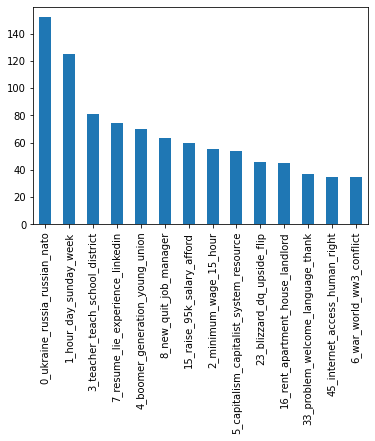

In [129]:
res_df.comment_topics.value_counts()[1:15].plot(kind="bar")

In [130]:
posts_df.topics.value_counts()

-1_work_get_make_say             87
0_work_get_time_would            66
1_people_get_want_work           44
2_interview_offer_get_company    22
Name: topics, dtype: int64

<AxesSubplot:>

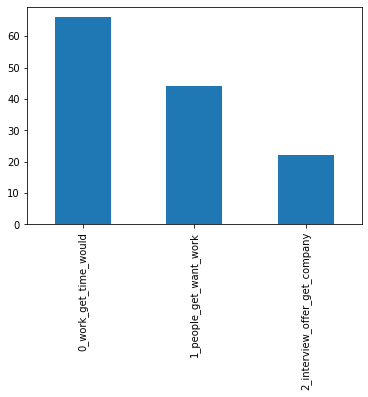

In [131]:
posts_df.topics.value_counts()[1:].plot(kind="bar")

# 4. Sentiment Analysis - Can we identify conflict with Sentiment?

In [133]:
fig = px.histogram(posts_df, x="sentiment")
fig.show()

In [136]:
posts_df

,index,post_id,title,flair,score,upvote_ratio,subreddit,url,num_comments,body,created,body_word_token,body_tag,body_string,topics,sentiment,word_counts,relevance_score
0,2,t20l2m,My story about a dairy Queen Blizzard and a terrified teen girl,NaN,6267,0.97,antiwork,https://www.reddit.com/r/antiwork/comments/t20l2m/my_story_about_a_dairy_queen_blizzard_and_a/,540,"last night, i went to dairy queen to indulge my blizzard craving.\n\nfor anyone who does not know, if they do not serve the blizzard ""upside down"" (turn it over before they hand it to you), then you get it for free!\n\nwell, last night, it happened to me! this (probably) 16yo teen girl tried to hand my blizzard to me without flipping it.\n\njust as i touched it, i said ""ahhhhhh!"" with a huge smile. she instantly looked terrified, pulled it back, flipped it over, and handed it to me.\n\ni said, ""thanks, but do not i get it for free?"" keep in mind, i was really smiling and talking in a fun voice.\n\nshe started getting tears in her eyes!\ni then realized this was not funny.\n\nshe quietly said ""yes, you do"".\n\ni asked ""wait, will you get in trouble?""\n\n""i do not know, maybe, because this is the second time tonight and my boss already yelled at me"".\n\ni nearly lost it. here is basically a little girl, who is so terrified to make a mistake, that she instantly cried when making a sim...",1.645892e+09,"['last', 'night', ',', 'go', 'dairy', 'queen', 'indulge', 'blizzard', 'crave', '.', 'anyone', 'know', ',', 'serve', 'blizzard', '``', 'upside', ""''"", '(', 'turn', 'hand', ')', ',', 'get', 'free', '!', 'well', ',', 'last', 'night', ',', 'happen', '!', '(', 'probably', ')', '16yo', 'teen', 'girl', 'try', 'hand', 'blizzard', 'without', 'flip', '.', 'touch', ',', 'say', '``', 'ahhhhhh', '!', ""''"", 'huge', 'smile', '.', 'instantly', 'look', 'terrify', ',', 'pull', 'back', ',', 'flip', ',', 'hand', '.', 'say', ',', '``', 'thanks', ',', 'get', 'free', '?', ""''"", 'keep', 'mind', ',', 'really', 'smile', 'talk', 'fun', 'voice', '.', 'start', 'get', 'tear', 'eye', '!', 'realize', 'funny', '.', 'quietly', 'say', '``', 'yes', ',', ""''"", '.', 'ask', '``', 'wait', ',', 'get', 'trouble', '?', ""''"", '``', 'know', ',', 'maybe', ',', 'second', 'time', 'tonight', 'bos', 'already', 'yell', ""''"", '.', 'nearly', 'lose', '.', 'basically', 'little', 'girl', ',', 'terrify', 'make', 'mistake', ',', 'instantl...","[[('last', 'JJ')], [('night', 'NN')], [(',', ',')], [('went', 'VBD')], [('dairy', 'NN')], [('queen', 'NN')], [('indulge', 'NN')], [('blizzard', 'NN')], [('craving', 'VBG')], [('.', '.')], [('anyone', 'NN')], [('know', 'VB')], [(',', ',')], [('serve', 'NN')], [('blizzard', 'NN')], [('``', '``')], [('upside', 'NN')], [(""''"", ""''"")], [('(', '(')], [('turn', 'NN')], [('hand', 'NN')], [(')', ')')], [(',', ',')], [('get', 'VB')], [('free', 'JJ')], [('!', '.')], [('well', 'RB')], [(',', ',')], [('last', 'JJ')], [('night', 'NN')], [(',', ',')], [('happened', 'VBD')], [('!', '.')], [('(', '(')], [('probably', 'RB')], [(')', ')')], [('16yo', 'CD')], [('teen', 'NN')], [('girl', 'NN')], [('tried', 'VBN')], [('hand', 'NN')], [('blizzard', 'NN')], [('without', 'IN')], [('flipping', 'VBG')], [('.', '.')], [('touched', 'VBN')], [(',', ',')], [('said', 'VBD')], [('``', '``')], [('ahhhhhh', 'NN')], [('!', '.')], [(""''"", ""''"")], [('huge', 'JJ')], [('smile', 'NN')], [('.', '.')], [('instantly', 'RB')]...","last night , go dairy queen indulge blizzard crave . anyone know , serve blizzard `` upside '' ( turn hand ) , get free ! well , last night , happen ! ( probably ) 16yo teen girl try hand blizzard without flip . touch , say `` ahhhhhh ! '' huge smile . instantly look terrify , pull back , flip , hand . say , `` thanks , get free ? '' keep mind , really smile talk fun voice . start get tear eye ! realize funny . quietly say `` yes , '' . ask `` wait , get trouble ? '' `` know , maybe , second time tonight bos already yell '' . nearly lose . basically little girl , terrify make 

In [138]:
fig = px.box(posts_df, x="sentiment", y='relevance_score')
fig.show()

In [132]:
fig = px.histogram(comments_df, x="sentiment")
fig.show()

In [150]:
comments_df.columns

Index(['index', 'post_id', 'comment_id', 'parent_id', 'comment',
       'up_vote_count', 'down_vote_count', 'controversiality',
       'total_awards_received', 'score', 'is_locked', 'is_collapsed',
       'is_submitter', 'created_utc', 'comment_word_token', 'comment_tag',
       'body_string', 'topics', 'sentiment', 'word_counts'],
      dtype='object')

In [157]:
# fig = px.scatter(res_df, x="comment_relevance", y='comment_score', color='sentiment')
# fig.show()

In [140]:
fig = px.box(res_df, x="post_id", y='comment_relevance')
fig.show()